In [18]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Description
The dataset used in this notebook is loaded from `../Data/heart_2020_cleaned.csv`. It contains health-related information for predicting heart disease. Below are the main features:

- **HeartDisease**: Target variable (0 = No, 1 = Yes)
- **BMI**: Body Mass Index (float)
- **Smoking**: Whether the person smokes (0 = No, 1 = Yes)
- **AlcoholDrinking**: Alcohol consumption (0 = No, 1 = Yes)
- **Stroke**: History of stroke (0 = No, 1 = Yes)
- **PhysicalHealth**: Number of physically unhealthy days in the past 30 days (int)
- **MentalHealth**: Number of mentally unhealthy days in the past 30 days (int)
- **DiffWalking**: Difficulty walking (0 = No, 1 = Yes)
- **Sex**: Gender (0 = Female, 1 = Male)
- **AgeCategory**: Encoded age group (int)
- **Race**: Encoded race category (int)
- **Diabetic**: Diabetes status (int)
- **PhysicalActivity**: Physical activity in the past 30 days (0 = No, 1 = Yes)
- **GenHealth**: General health status (int)
- **SleepTime**: Average hours of sleep per day (int)
- **Asthma**: Asthma diagnosis (0 = No, 1 = Yes)
- **KidneyDisease**: Kidney disease diagnosis (0 = No, 1 = Yes)
- **SkinCancer**: Skin cancer diagnosis (0 = No, 1 = Yes)



In [2]:
# Load dataset
# Use the correct relative path to the Data folder
data = pd.read_csv("../Data/heart_2020_cleaned.csv")

In [3]:
# Encode all object (string) columns automatically
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

In [4]:
# Drop rows with missing values if any
data = data.dropna()

In [5]:
# Identify categorical and numeric columns
def get_column_types(df):
    cat_cols = []
    num_cols = []
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)
    return cat_cols, num_cols

cat_cols, num_cols = get_column_types(data.drop('HeartDisease', axis=1))

In [6]:
# Prepare options for categorical columns
def get_options(df, col):
    vals = df[col].unique()
    return sorted([str(v) for v in vals])

labels = list(data.drop('HeartDisease', axis=1).columns)
input_widgets = []

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data.drop('HeartDisease', axis=1), data['HeartDisease'], test_size=0.2, random_state=42)

In [8]:
# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [10]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.9042511608999515
Precision: 0.3560606060606061
Recall: 0.11766809728183118
F1 Score: 0.17688172043010753
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.36      0.12      0.18      5592

    accuracy                           0.90     63959
   macro avg       0.64      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959



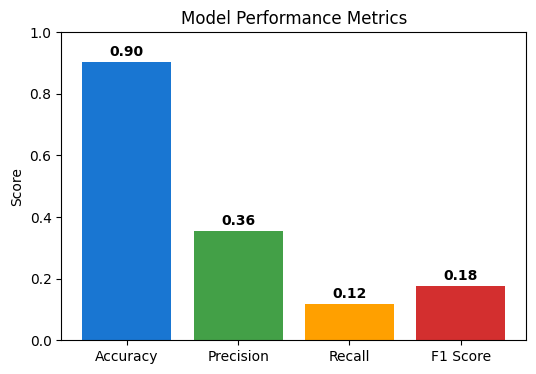

In [11]:
# Plot metrics
metrics = [accuracy, precision, recall, f1]
labels_ = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(6,4))
plt.bar(labels_, metrics, color=['#1976D2', '#43A047', '#FFA000', '#D32F2F'])
plt.ylim(0,1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

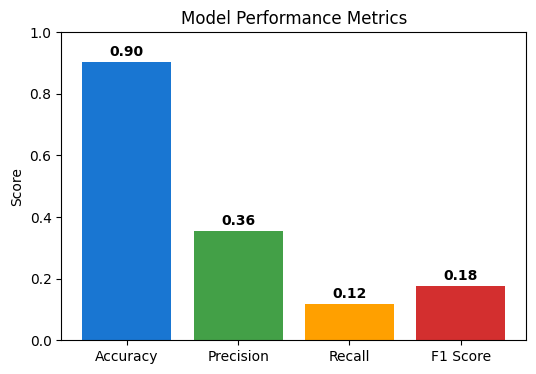

In [12]:
# Plot metrics
import matplotlib.pyplot as plt
metrics = [accuracy, precision, recall, f1]
labels_ = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(6,4))
plt.bar(labels_, metrics, color=['#1976D2', '#43A047', '#FFA000', '#D32F2F'])
plt.ylim(0,1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()